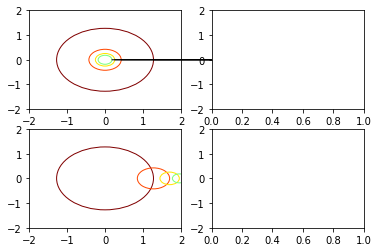

In [1]:
import numpy as np
from scipy.signal import square
from matplotlib import animation
from matplotlib import pyplot as plt
from matplotlib.patches import ConnectionPatch

t = np.linspace(0, 1, 500, endpoint=False)
sq_wave = square(2*np.pi*t)

def bn(n, points, t):
    b = points*(np.sin(2*n*np.pi*t))
    return 2*b.sum()/points.size

bn_lst = []
sq_mat = np.zeros((4, 500), dtype = np.complex_)
for idx, i in enumerate((1,3,5,7)):
    bn_lst.append(bn(i, sq_wave, t))
    sq_mat[idx, :] = bn_lst[idx] * np.exp(1j*2*np.pi*i*t)
sq_mat_circ = np.add.accumulate(sq_mat, 0)

fig = plt.figure(1)
ax_1 = fig.add_subplot(221)
ax_2 = fig.add_subplot(222)
ax_3 = fig.add_subplot(223)
ax_4 = fig.add_subplot(224)

cmap = plt.get_cmap('jet_r')
N = 6

draw_lst = [ax_2.plot(0,0, color = cmap(i/N))[0] for i in range(4)] + [ax_3.plot(0,0, color = cmap(4/N))[0]] + [ax_4.plot(0,0, color = cmap(5/N))[0]]
circle_lst = [plt.Circle((0,0), bn_lst[i%4], alpha = 1, color = cmap(i%4/N), fill = False) for i in range(8)]
con_patch_lst = [ConnectionPatch(xyA=(0,0), xyB=(0,0), coordsA="data", coordsB="data", axesA=ax_1, axesB=ax_2, zorder=25) for i in range(5)]

for i in range(4):
    ax_1.add_patch(circle_lst[i])
    ax_1.add_artist(con_patch_lst[i])

for i in range(4, 8):
    ax_3.add_patch(circle_lst[i])
ax_3.add_artist(con_patch_lst[-1])

ax_2.set_zorder(-1)
ax_4.set_zorder(-1)

def ani(i):
    for j in range(4):
        con_patch_lst[j].remove()
        con_patch_lst[j] = ConnectionPatch(xyA=(sq_mat[j, i].real, sq_mat[j, i].imag), xyB=(t[i], sq_mat[j, i].imag), coordsA="data", coordsB="data", axesA=ax_1, axesB=ax_2, zorder=25)
        ax_1.add_artist(con_patch_lst[j])
        draw_lst[j].set_data(t[:i], sq_mat[j, :i].imag)
    for j in range(5, 8):
        circle_lst[j].center = (sq_mat_circ[j-5, i].real, sq_mat_circ[j-5, i].imag)
    con_patch_lst[-1].remove()
    con_patch_lst[-1] = ConnectionPatch(xyA=(sq_mat_circ[-1, i].real, sq_mat_circ[-1, i].imag), xyB=(t[i], sq_mat_circ[-1, i].imag), coordsA="data", coordsB="data", axesA=ax_3, axesB=ax_4, zorder=25)
    ax_3.add_artist(con_patch_lst[-1])
    draw_lst[-2].set_data(sq_mat_circ[-1, :i].real, sq_mat_circ[-1, :i].imag)
    draw_lst[-1].set_data(t[:i], sq_mat_circ[-1, :i].imag)
    return ([])

ani = animation.FuncAnimation(fig, ani, np.arange(0, 500, i), interval=20, blit=True)
ax_1.set_xlim(-2,2)
ax_1.set_ylim(-2, 2)
ax_2.set_xlim(0,1)
ax_2.set_ylim(-2, 2)
ax_3.set_xlim(-2,2)
ax_3.set_ylim(-2, 2)
ax_4.set_xlim(0,1)
ax_4.set_ylim(-2, 2)
plt.show()